## Exercise
### Part 1
1. Take a picture of an apple and put it in the image folder in the notebook environment
2. Find the contour of the apple
3. Draw a yellow circle with the center placed on the center of the apple contour
4. Draw a square that precisely holds the apple
5. Take a picture of three seperate apples.
6. Use contours to programmatically identify the number of apples in the photo

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

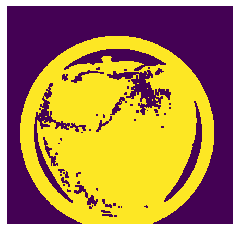

In [46]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


apple = cv2.imread("../images/apple.png")
apple = cv2.cvtColor(apple, cv2.COLOR_BGR2RGB)

def create_plot(image, title=''):
    plt.imshow(image, interpolation='none')
    plt.title(title)
    plt.axis('off')
    return plt

#Find the contour of the apple
def create_apple_mask(image):
    """From an image create a HSV mask by identifying lower and upper bounds of the three values"""
    # Color values in HSV
    red_lower = (0, 70, 50) # hsv (0-360, 0-255, 0-255) sometimes written as (0-360, 100%, 100%)
    red_upper = (10, 255, 255)

    hsv_img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
 
    mask = cv2.inRange(hsv_img, red_lower, red_upper) # inRange: exclude all pixels outside of range
    mask = cv2.dilate(mask, None, iterations=2)           # dilate: (like pupils) expand pixels around the center
    mask = cv2.erode(mask, None, iterations=2)            # erode: opposite of dilate. remove pixels from outer layer

    return mask

#Draw a yellow circle around the contour of the apple
def mark_object(image, mask):
    """find the largest contour in the mask, then use it to compute the minimum enclosing circle and centroid"""
    # Finds contours in a binary image. The contours are a useful tool for shape analysis and object detection and recognition.
    contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]

    c = max(contours, key=cv2.contourArea)
    ((x, y), radius) = cv2.minEnclosingCircle(c)

    # draw the circle and centroid on the frame,
    # then update the list of tracked points
    cv2.circle(image, center=(int(x), int(y)), radius=int(radius), color=(255, 0, 0), thickness=3)
    return image

mask = create_apple_mask(apple)
img = mark_object(apple, mask)
img_converted = cv2.cvtColor(apple, cv2.COLOR_RGB2BGR)
cv2.imwrite('../images/apple.png', img_converted)

create_plot(create_apple_mask(apple))

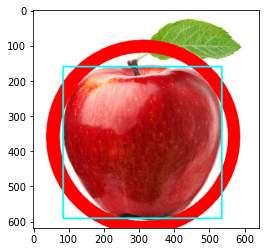

In [47]:
#Draw a rectangle around the apple
draw_img = apple.copy()
cv2.rectangle(draw_img,(85,160),(535,590),(0,255,255),3)
plt.imshow(draw_img)

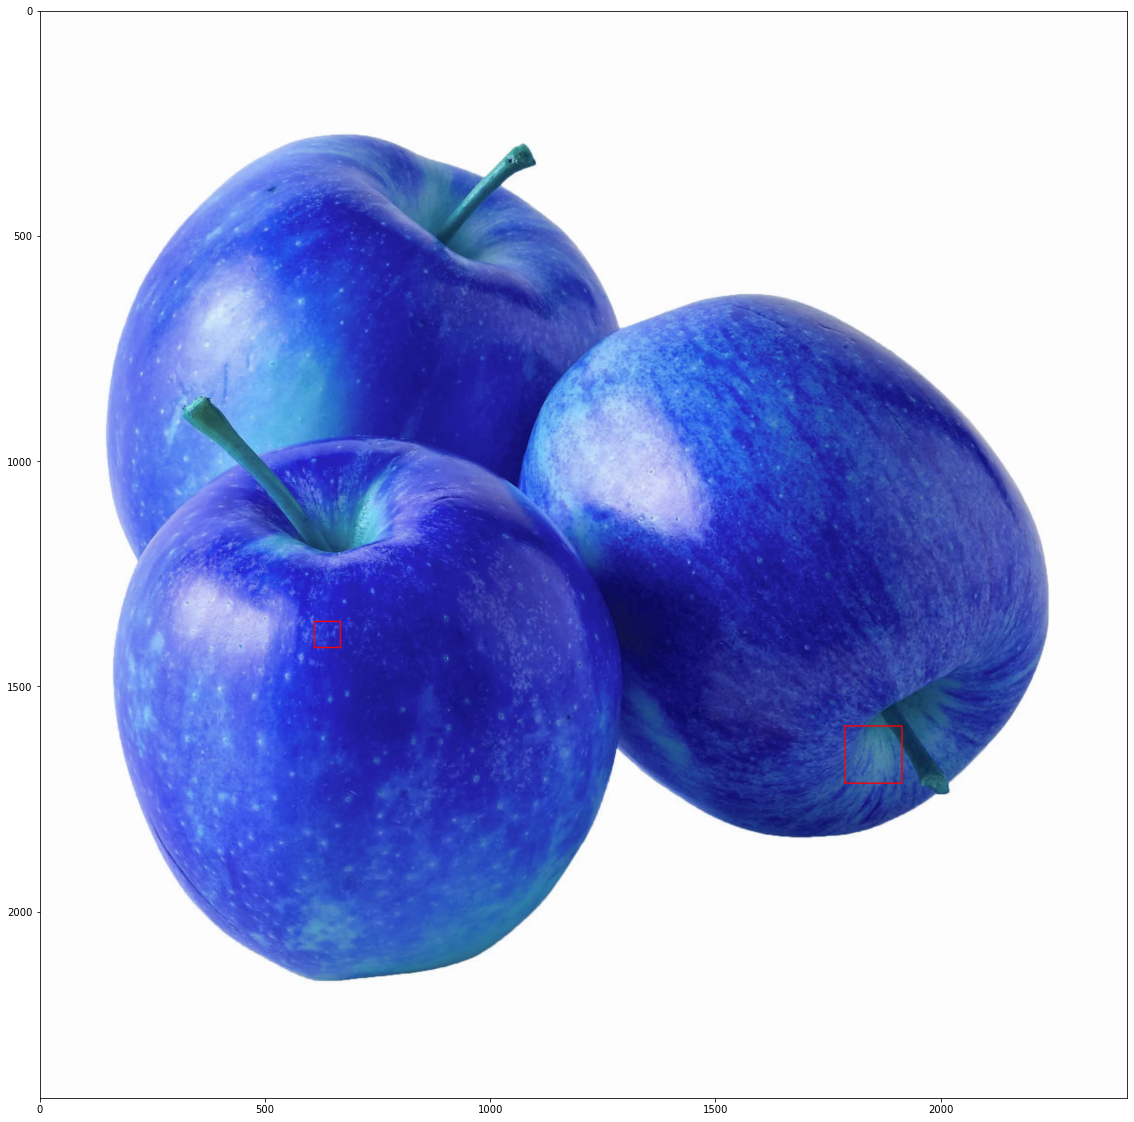

In [59]:
#Take three seperate pictures of apples and programatically identify number of apples
face_cascade = cv2.CascadeClassifier('../data/haarcascade_frontalface_default.xml')
img = cv2.imread('../images/apples.webp')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray)

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

figure = plt.figure(figsize = (100,20))
plt.imshow(img)

### Part 2 (Optional)
1. From [Data](https://unsplash.com/search/photos/jeep) use selenium to download all images of jeeps
2. Use OpenCV to reduce the amount of colors in the images
3. Use OpenCV to find corners [Help](https://docs.opencv.org/master/d8/dd8/tutorial_good_features_to_track.html)
4. (EXTRA) Find all the wheels